In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

Имортируем датафрейм через пандас

In [4]:
df = pd.read_csv('experiment.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

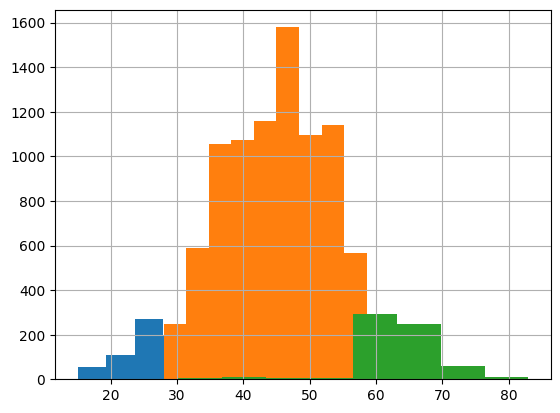

In [7]:
control = df.query("experiment_group == 'control'").groupby('district', as_index=False).agg('delivery_time').hist()

Распределение времени доставки по районам в двух группах

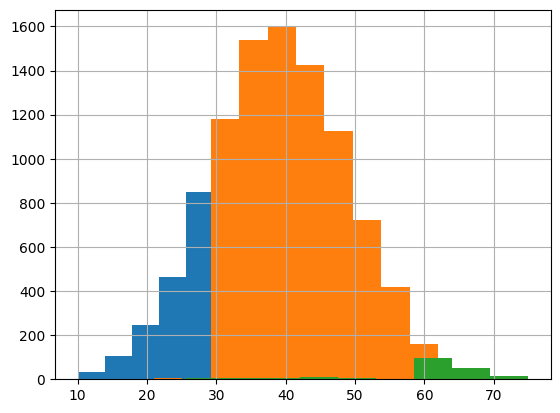

In [20]:
test = df.query("experiment_group == 'test'").groupby('district', as_index=False).agg('delivery_time').hist()

In [21]:
abs(df.query("experiment_group == 'control'").count() - df.query("experiment_group == 'test'").count())

order_id            12
delivery_time       12
district            12
experiment_group    12
dtype: int64

Разница наблюдений между тестовой и контрольной группой

In [31]:
print(scipy.stats.normaltest(df.query("experiment_group == 'control'").delivery_time))#normal distribution (pvalue > 0.05)
print(np.round(df.query("experiment_group == 'control'").delivery_time.std(), 2))

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)
9.99


Проверка на нормальность распределения 

In [29]:
print(scipy.stats.normaltest(df.query("experiment_group == 'test'").delivery_time))#not normal distribution (pvalue < 0.05)
print(np.round(df.query("experiment_group == 'test'").delivery_time.std(), 2))

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)
9.88


Воспользуемся T-критерием Стьюдента и получим статистически важное различие между двумя группами

In [33]:
scipy.stats.ttest_ind(df.query("experiment_group == 'control'").delivery_time,
                      df.query("experiment_group == 'test'").delivery_time)

TtestResult(statistic=43.03582663183714, pvalue=0.0, df=20194.0)

In [38]:
mean_test = df.query("experiment_group == 'test'").delivery_time.mean()
mean_control = df.query("experiment_group == 'control'").delivery_time.mean()

Узнаем разницу средних двух групп в процентах

In [44]:
diff = (mean_control - mean_test)/mean_control * 100
display(np.round(-diff, 2))

-13.35

Вывод:  Следует воспользоваться новым алгоритмом, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тестовой группе меньше, чем в контрольной.